In [1]:
import pandas as pd

import re
import numpy as np

from pykospacing import spacing

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_excel('공모전_제공_데이터(1차).xlsx', sheet_name = '학습데이터')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NO                    1000 non-null   int64  
 1   NO2                   1000 non-null   int64  
 2   발화                    1000 non-null   object 
 3   발화1                   1000 non-null   object 
 4   발화1의 우선순위             1000 non-null   int64  
 5   발화2                   32 non-null     object 
 6   발화2의 우선순위             32 non-null     float64
 7   발화3                   3 non-null      object 
 8   발화3의 우선순위             3 non-null      float64
 9   최종분류(우선순위 가장 높은것 선택)  1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [4]:
data.head(5)

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
0,1,6438,상담직원과 빠른연결했슴좋겠어요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
1,2,6850,안기다리고. 빨리상담되었음좋겠다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
2,3,7294,너무 오래기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
4,5,10350,상담받으려면오래기다리는게불편함,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템


In [5]:
data_rank = sorted(data['발화1의 우선순위'].unique())

In [6]:
rank = pd.read_excel('공모전_제공_데이터(1차).xlsx', sheet_name = '우선순위')

In [7]:
rank

,우선순위,의도명(유형)
0,1,칭찬>고객서비스>상담원
1,2,칭찬>고객서비스>상담시스템
2,3,칭찬>고객서비스
3,4,불만>고객서비스>상담원
4,5,불만>고객서비스>상담시스템
5,6,불만>고객서비스
6,7,칭찬>삼성카드>혜택
7,8,칭찬>삼성카드>할부금융상품
8,9,칭찬>삼성카드>커뮤니티서비스
9,10,칭찬>삼성카드>카드이용/결제


In [8]:
data.isnull().sum()

NO                        0
NO2                       0
발화                        0
발화1                       0
발화1의 우선순위                 0
발화2                     968
발화2의 우선순위               968
발화3                     997
발화3의 우선순위               997
최종분류(우선순위 가장 높은것 선택)      0
dtype: int64

In [21]:
data.fillna(0)

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
0,1,6438,상담직원과 빠른 연결했슴 좋겠어요,불만>고객서비스>상담시스템,5,0,0.0,0,0.0,불만>고객서비스>상담시스템
1,2,6850,안기다리고. 빨리 상담되었음 좋겠다,불만>고객서비스>상담시스템,5,0,0.0,0,0.0,불만>고객서비스>상담시스템
2,3,7294,너무 오래 기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,0,0.0,0,0.0,불만>고객서비스>상담시스템
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,0,0.0,0,0.0,불만>고객서비스>상담시스템
4,5,10350,상담받으려면 오래 기다리는 게 불편함,불만>고객서비스>상담시스템,5,0,0.0,0,0.0,불만>고객서비스>상담시스템
...,...,...,...,...,...,...,...,...,...,...
995,9958,103,카드분실된 지 1분 만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린 지도 몰랐는...,칭찬>삼성카드>카드상품,11,0,0.0,0,0.0,칭찬>삼성카드>카드상품
996,9961,2,수시로 6개월 무이자 할부와 링크 혜택이 다른 카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7.0,0,0.0,칭찬>삼성카드>혜택
997,9962,4,무이자 할부 자주 많이 주셔서 감사합니다,칭찬>삼성카드>혜택,7,0,0.0,0,0.0,칭찬>삼성카드>혜택
998,9963,5,무이자 혜택 만족긴 할부 만족 잘 쓰고 있습니다,칭찬>삼성카드>혜택,7,0,0.0,0,0.0,칭찬>삼성카드>혜택


In [24]:
data_2 = data[data['발화2의 우선순위']>0]

In [27]:
data_2

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
8,9,12595,ars상담직원 넘많이 기다려야 하는 불편해요,불만>삼성카드>상담/채널,33,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담시스템
24,25,22076,ARS 지동응답 불필요한 안내 축소 상담직원과 빠른 연결을 원합니다 추석 연휴 잘 ...,불만>삼성카드>상담/채널,33,불만>고객서비스>상담시스템,5.0,칭찬>기타,24.0,불만>고객서비스>상담시스템
96,97,24989,다른 카드사의 경우 삼성카드사 보다 통화대기 시간이 짧다.,칭찬>기타,24,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담시스템
109,110,25015,신한카드는 상담사 연결시간은 짧아서 좋았습니다 반면 삼성카드는 넘기네요,칭찬>기타,24,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담시스템
121,122,25063,전화 연결이 어려울 때가 가끔 있어요 그래도 타사 카드보다는 연결이 잘 돼요,불만>고객서비스>상담시스템,5,칭찬>삼성카드,23.0,NaN,NaN,불만>고객서비스>상담시스템
136,1262,1588,친절하고 기다리지 않게 하여주기 바람니다,불만>고객서비스>상담원,4,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담원
143,1269,6805,그저 상담은 복사 붙여넣기 시 발놈들,불만>고객서비스>상담원,4,불만>기타,42.0,NaN,NaN,불만>고객서비스>상담원
145,1271,7987,전화 시 신속하고 빠르게 연결되었으면 좋겠습니다. 또 상담원이 좀 더 친절했으면 합니다,불만>고객서비스>상담시스템,5,불만>고객서비스>상담원,4.0,NaN,NaN,불만>고객서비스>상담원
158,1284,11674,다른 카드사 상담 직원은 매우 친절한데 오늘 상담 직원은 최악의 상담사,칭찬>기타,24,불만>고객서비스>상담원,4.0,NaN,NaN,불만>고객서비스>상담원
163,1289,11930,정확하게 설명이 필요하고 상담원 연결이 잘 안 된다,불만>고객서비스>상담원,4,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담원


In [25]:
data_3 = data[data['발화3의 우선순위']>0]

In [28]:
data_3

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
24,25,22076,ARS 지동응답 불필요한 안내 축소 상담직원과 빠른 연결을 원합니다 추석 연휴 잘 ...,불만>삼성카드>상담/채널,33,불만>고객서비스>상담시스템,5.0,칭찬>기타,24.0,불만>고객서비스>상담시스템
271,1397,17813,타 카드사는 상담원들이 기계적인 것이 아닌 친절하게 응대함 삼성카드는 말도 빠르고 ...,칭찬>기타,24,불만>고객서비스>상담원,4.0,불만>고객서비스>상담원,4.0,불만>고객서비스>상담원
558,5559,209,부가세 신고 시기에 맞게 바로 한 번에 연결 메뉴가 있어 너무 편했습니다. 아이디어...,칭찬>삼성카드>생활편의서비스,14,칭찬>고객서비스>상담원,1.0,불만>고객서비스>상담원,4.0,칭찬>고객서비스>상담원


In [13]:
for i in range(0, len(data['발화'])):
    data['발화'][i] = spacing(data['발화'][i])

<ipython-input-13-8c5c0c75d8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['발화'][i] = spacing(data['발화'][i])


In [14]:
data.head(15)

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택)
0,1,6438,상담직원과 빠른 연결했슴 좋겠어요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
1,2,6850,안기다리고. 빨리 상담되었음 좋겠다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
2,3,7294,너무 오래 기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
4,5,10350,상담받으려면 오래 기다리는 게 불편함,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
5,6,11435,상담하려면 많이 기다려야 하는 게 불편합니다.,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
6,7,12111,상담원이 통화 중이라 많이 기다려야 해요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
7,8,12155,상담직원과의 연결이 빠르게 연결되면 촣겠습니다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템
8,9,12595,ars상담직원 넘많이 기다려야 하는 불편해요,불만>삼성카드>상담/채널,33,불만>고객서비스>상담시스템,5.0,NaN,NaN,불만>고객서비스>상담시스템
9,10,12745,상담원 통화가 너 믜 힘듬,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템


내용의 최대 길이 :  252
내용의 평균 길이 :  26.682


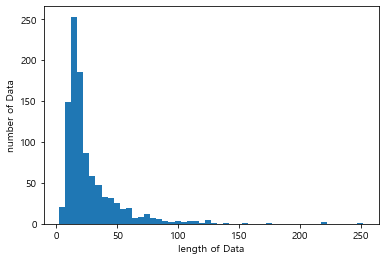

In [15]:
print("내용의 최대 길이 : ", max(len(l) for l in data['발화'])) 
print("내용의 평균 길이 : ", sum(map(len, data['발화']))/ len(data['발화']))
plt.hist([len(s) for s in data['발화']], bins=50) 
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()


In [33]:
data['발화3'][24][0:2]

'칭찬'

In [35]:
labeling_list = []

In [36]:
for i in range(0, len(data)):
    if data['발화3의 우선순위'][i] > 0:
        labeling_list.append(data['발화3'][i][0:2])
    elif data['발화2의 우선순위'][i] >0:
        labeling_list.append(data['발화2'][i][0:2])
    else:
        labeling_list.append(data['발화1'][i][0:2])

In [37]:
data['labeling'] = labeling_list

In [38]:
data.to_excel('발화내용 띄어쓰기 데이터.xlsx')

,NO,NO2,발화,발화1,발화1의 우선순위,발화2,발화2의 우선순위,발화3,발화3의 우선순위,최종분류(우선순위 가장 높은것 선택),labeling
0,1,6438,상담직원과 빠른 연결했슴 좋겠어요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템,불만
1,2,6850,안기다리고. 빨리 상담되었음 좋겠다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템,불만
2,3,7294,너무 오래 기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템,불만
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템,불만
4,5,10350,상담받으려면 오래 기다리는 게 불편함,불만>고객서비스>상담시스템,5,NaN,NaN,NaN,NaN,불만>고객서비스>상담시스템,불만
...,...,...,...,...,...,...,...,...,...,...,...
995,9958,103,카드분실된 지 1분 만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린 지도 몰랐는...,칭찬>삼성카드>카드상품,11,NaN,NaN,NaN,NaN,칭찬>삼성카드>카드상품,칭찬
996,9961,2,수시로 6개월 무이자 할부와 링크 혜택이 다른 카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7.0,NaN,NaN,칭찬>삼성카드>혜택,칭찬
997,9962,4,무이자 할부 자주 많이 주셔서 감사합니다,칭찬>삼성카드>혜택,7,NaN,NaN,NaN,NaN,칭찬>삼성카드>혜택,칭찬
998,9963,5,무이자 혜택 만족긴 할부 만족 잘 쓰고 있습니다,칭찬>삼성카드>혜택,7,NaN,NaN,NaN,NaN,칭찬>삼성카드>혜택,칭찬
